In [1]:
from openvqe.vqe import VQE
import matplotlib.pyplot as plt

# Variational Quantum Eigensolver (VQE) for H2 Molecule

This Jupyter Notebook demonstrates the use of the Variational Quantum Eigensolver (VQE) algorithm to find the ground state energy of the H2 molecule. The VQE algorithm is a hybrid quantum-classical algorithm that leverages the power of quantum computers to solve optimization problems.

## UPCCGSD Method

**Structure Description**:  
UPCCGSD is an advanced method in quantum chemistry that extends the unitary coupled cluster (UCC) approach by utilizing **generalized singles and doubles** excitations. In this method, **singles (S)** and **doubles (D)** excitations are not restricted to predefined particle-hole configurations but can involve **any orbital pairs**. This increases the flexibility of the wave function ansatz, allowing for a richer and more accurate representation of electron correlation in molecular systems. The ansatz is typically written as:  
$$
|\psi_{\text{UPCCGSD}}\rangle = e^{\hat{T}_{\text{G}} - \hat{T}_{\text{G}}^\dagger} |\phi_0\rangle
$$
where $ \hat{T}_{\text{G}} $ represents the generalized excitation operators, which include both single and double excitations across any orbital pairs.

---

**Key Features**:
- **Generalized Singles and Doubles**: Unlike traditional UCCSD, which only allows excitations between predefined pairs of orbitals, UPCCGSD allows excitations between any orbital pairs, offering a more flexible ansatz.
- **Unitary Operator**: The method uses a unitary operator to ensure the energy is variationally bounded, making it a reliable approach for quantum chemistry calculations.
- **Increased Expressiveness**: By using generalized excitations, UPCCGSD is able to capture more complex electron correlation effects, which are often crucial for accurately modeling molecular systems.
  
---

**Advantages**:
- **Higher Accuracy**: The flexibility to consider any orbital pairs increases the accuracy of the method, especially for systems with strong electron correlation.
- **Comprehensive Approach**: Suitable for more complex systems that require a richer description of electron interactions compared to simpler models like UCCSD.
- **Theoretical Rigor**: UPCCGSD maintains the systematic nature of UCC, making it a strong candidate for future developments in quantum chemistry simulations on quantum computers.

---

**Limitations**:
- **High Computational Cost**: The inclusion of generalized excitations increases the number of parameters and gates required, making the method computationally expensive.
- **Scalability Issues on NISQ Devices**: Due to the large circuit depth, UPCCGSD may be difficult to implement on current quantum hardware (NISQ devices), which are limited in terms of qubit count and coherence time.
- **Optimization Complexity**: With the larger number of parameters, the optimization process becomes more complex and may require sophisticated algorithms to efficiently find the optimal solution.

## Parameters

- **Molecule Symbol**: `H2`
- **Type of Generator**: `UPCCGSD`
- **Transformation**: `JW`
- **Active**: `False`

## Workflow

1. **Initialization**: Initialize the VQE algorithm with the specified parameters.
2. **Execution**: Execute the VQE algorithm to find the ground state energy.
3. **Results**: Plot the energy results and error results obtained from the VQE execution.


In [2]:
# user can type the name of molecule (H2, LIH, CO, CO2 such that their geormetries and properties are defined in MoleculeQlm())
molecule_symbol = 'H2'
# the type of generators: UCCSD, singlet_sd, singlet_gsd, spin_complement_gsd, spin_complement_gsd_twin, sUPCCGSD
# suppose user type sUPCCGSD
type_of_generator = 'sUPCCGSD'
# user can type any of the following three transformations: JW,  Bravyi-Kitaev and Parity-basis
transform = 'JW'
# the non_active space selection
active = False

In [3]:
vqe = VQE('ucc', molecule_symbol, type_of_generator, transform, active)
vqe.execute()

 --------------------------------------------------------------------------
Running in the non active case: 
molecule symbol: H2 
molecule basis: 6-31g 
type of generator: sUPCCGSD 
transform: JW 
options: {'step': 0.01} 
 --------------------------------------------------------------------------
 --------------------------------------------------------------------------
                                                          
                      Generate Hamiltonians and Properties from :
                                                          
 --------------------------------------------------------------------------
                                                          
Number of electrons =  2
Number of qubits before active space selection =  8
Orbital energies =  [-0.59279976  0.23579258  0.77956294  1.39138474]
Nuclear repulsion =  0.70556961456
Noons =  [1.9705947706867002, 0.024127481185769732, 0.0050191265511946815, 0.00025862157633543]
Hamiltonian info {'MP2': -1.1

/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/openvqe/common_files/molecule_factory.py:473: UserWarning: This guess_init_state function is deprecated.
  _, _, hf_init = get_cluster_ops_and_init_guess(


tolerance=  0.0001
method=  BFGS


/home/nathan/miniconda/envs/openvqe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Optimization terminated successfully.
         Current function value: -1.151689
         Iterations: 22
         Function evaluations: 551
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: -1.143323
         Iterations: 14
         Function evaluations: 418
         Gradient evaluations: 22
iterations are: {'minimum_energy_result1_guess': [-1.1516885082092112], 'minimum_energy_result2_guess': [-1.1433228514317597], 'theta_optimized_result1': [[-0.0033983690892621372, -0.0048686553939534544, 0.01152413444279053, 0.0035464329504122424, 0.013565600459588932, 0.011028945702150735, -0.10829145008804798, -0.052859755264015325, -0.016379066851877337, -0.0232485208596788, -0.04081214773817673, -0.008421529876254125, 0.003066331137078018, -0.001111899699029276, -0.0018717722420452548, -0.0036527872615503697, 0.6002603881294875, 0.0027334707608329067]], 'theta_optimized_result2': [[1.906170599481347e-06, -1.1087905565329073e-06, -0.00147161

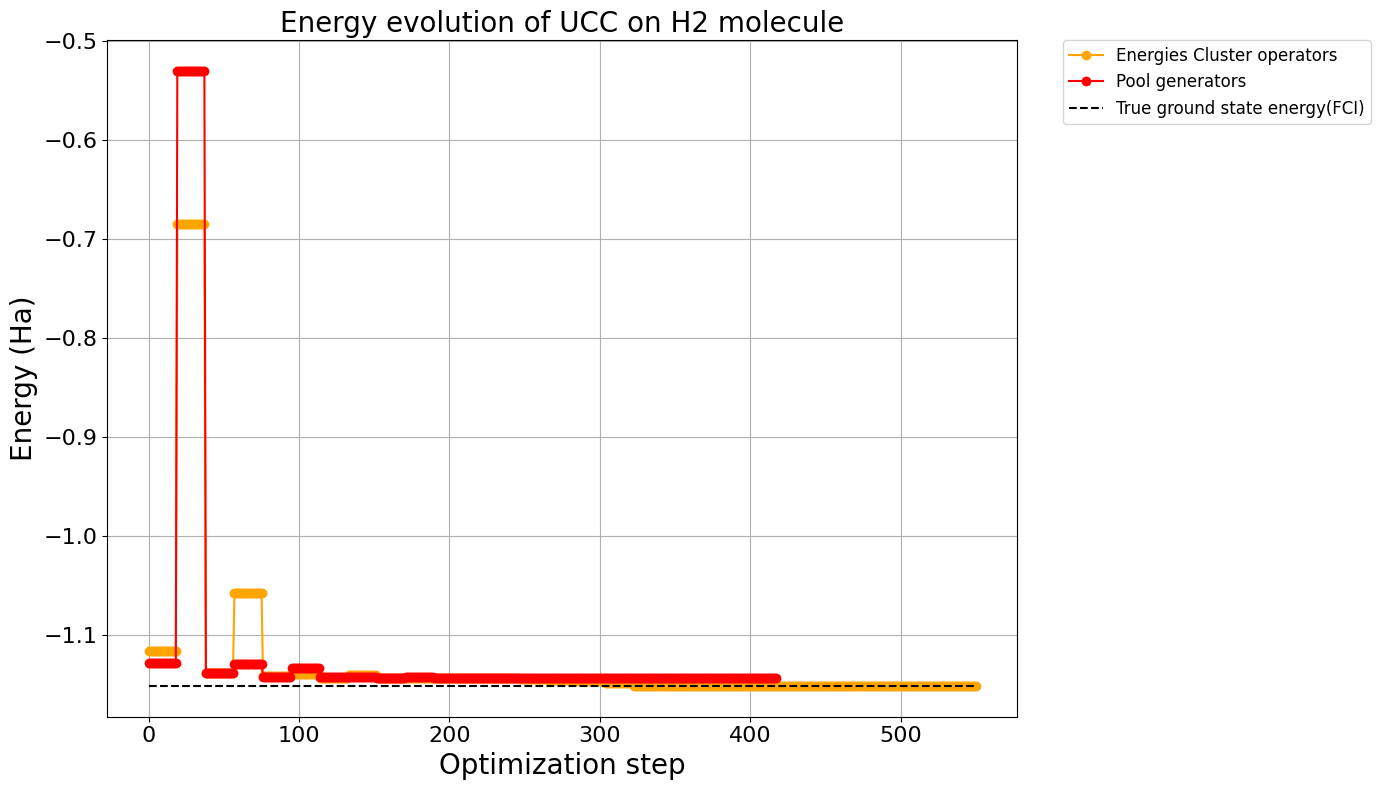

In [4]:
vqe.plot_energy_result()

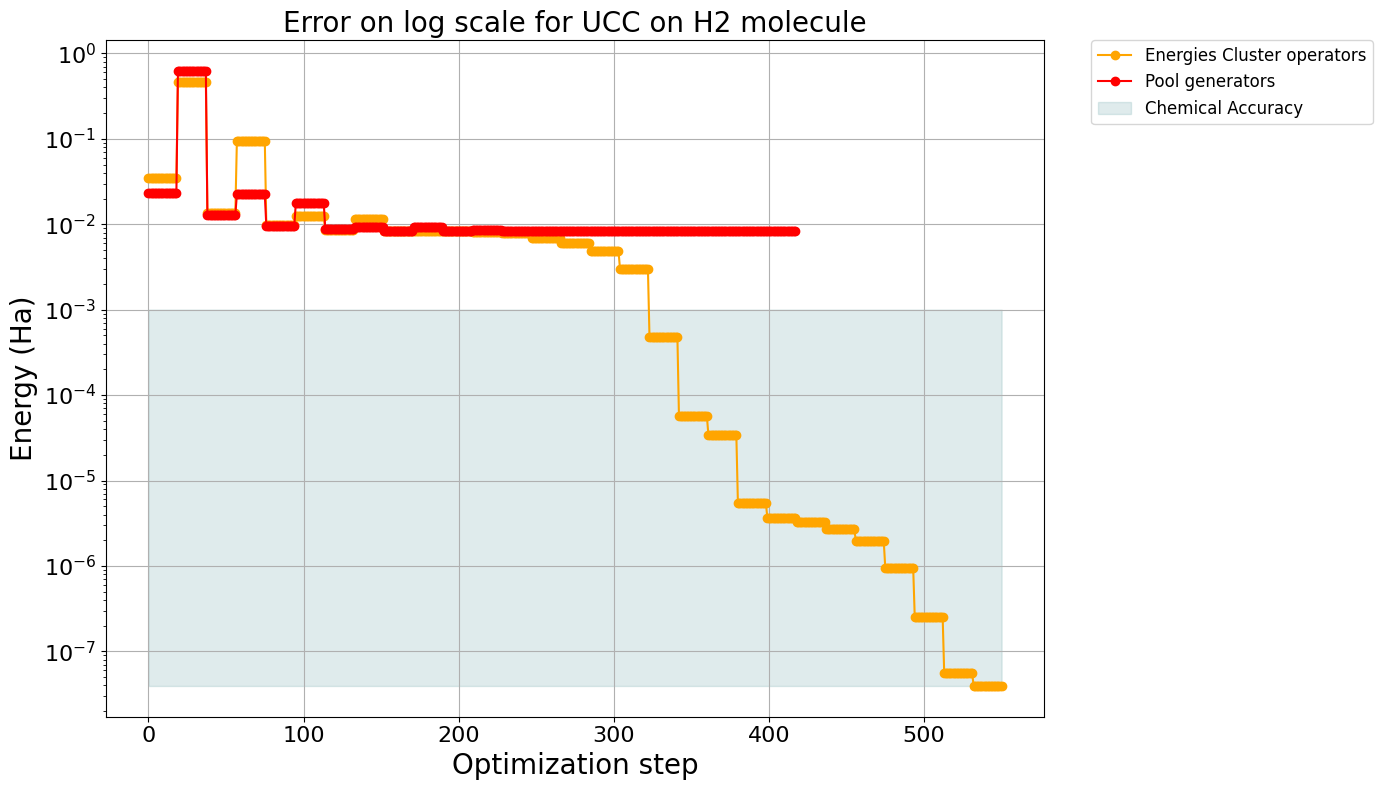

In [5]:
vqe.plot_error_result()